# Data Visualization
Before jumping straight into the analysis of the data, it's a good idea to get a feel of your data. This is best done using data visualization toegether with some descriptive statistics. By getting a feel for the data, you can ask more informative questions. It also allows a clear way of presenting any discoveries to others, which is sometimes the whole point when doing data analysis.

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')

## Basic Plotting

<IPython.core.display.Javascript object>


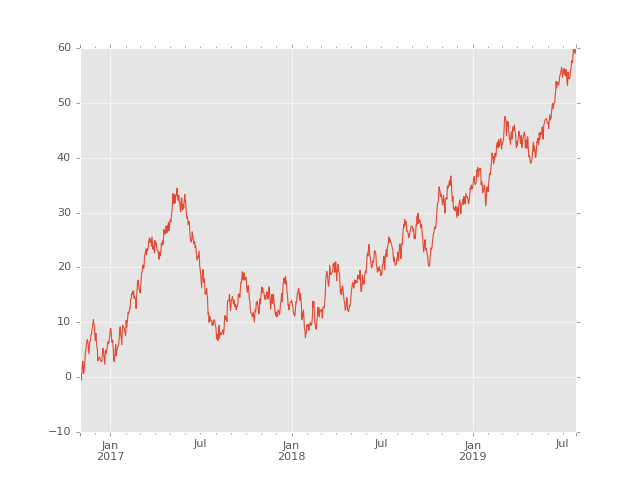

In [45]:
#Series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/1/2016', periods = 1000))
#print(ts)#cols: date and randn
ts = ts.cumsum()#basically a random walk
ts.plot()

If we have a DataFrame, we can use plot() to plot all columns with corresponding labels

<IPython.core.display.Javascript object>


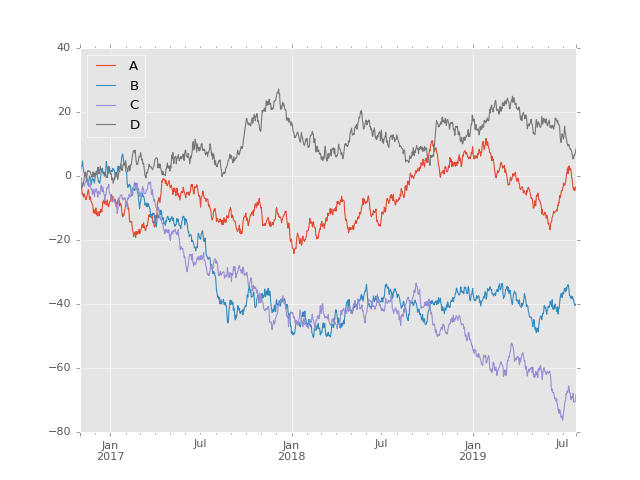

In [46]:
#DataFrame
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
#DataFrame takes a np array, index are row names, columns are column names
df = df.cumsum()#make it like a random walk
df.plot()#df.figure()

It's also useful to take a look at the data directly:

In [47]:
df.head(5)#just a sanity check

,A,B,C,D
2016-11-01,-0.615676,1.324636,-0.666727,0.078367
2016-11-02,-3.118865,1.325423,-3.536165,-1.007109
2016-11-03,-3.196331,3.103130,-2.896620,-0.578614
2016-11-04,-3.649272,3.302248,-3.458289,-3.505433
2016-11-05,-5.106770,3.154154,-3.108914,-3.560916


To Plot one column against another:

<IPython.core.display.Javascript object>


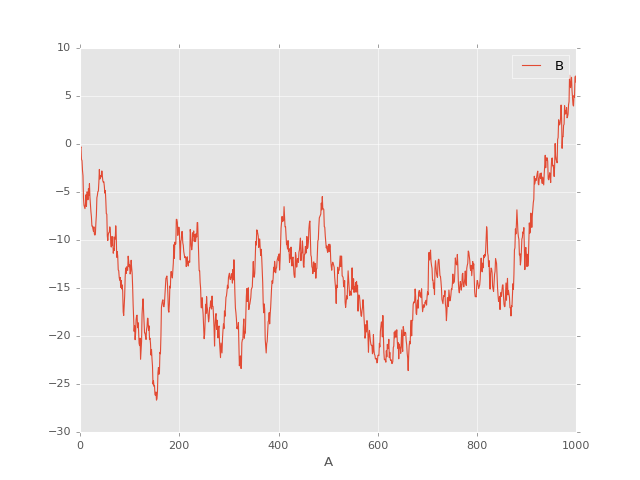

In [48]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns=['B','C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))#a 1000 length pd.Series
df3.plot(x='A', y='B')

In [49]:
df3.head(5)

,B,C,A
0,-0.389494,0.598512,0
1,-0.418670,-0.299539,1
2,-0.293327,-0.848179,2
3,-1.611563,-1.582410,3
4,-1.733893,-3.377252,4


## Histograms
We use histograms often to look at how the data is distributed using DataFrame.plot.hist() and Series.plot.hist(). This is important since certain algorithms often assume that the data follows some distribution. If it doens't, the analysis would be invalid. 

<IPython.core.display.Javascript object>


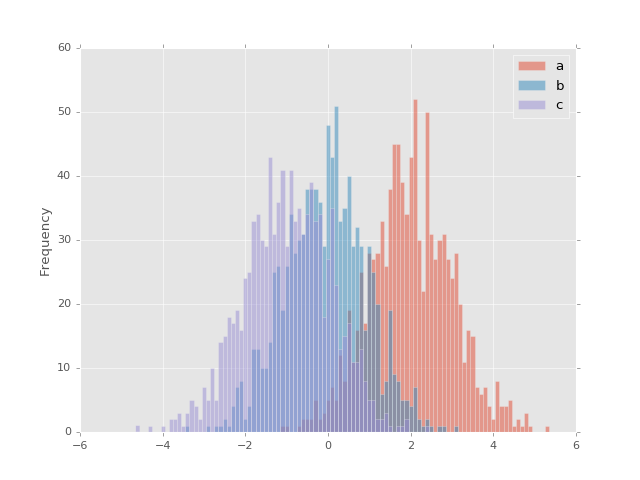

In [50]:
df4 = pd.DataFrame({
        'a':np.random.randn(1000)+2,
        'b':np.random.randn(1000),
        'c':np.random.randn(1000)-1
    }, columns=['a','b','c'])
#plt.figure();#I don't think I need this with inline plot
df4.plot.hist(alpha=.5, bins = 100)

## QQ-plot

qqplots (quantil-quantile plots) help us visually determine wheter some data follows a normal distribution. If the datapoints roughly follow a straight line, then the data is approximately normal and we can apply common techniques like linear regression. The x-axis represents the theoretical quantiles assuming it were normal, while the y-axis represents the acutal data in units of standard deviations from the mean. Notice that the second plot has 3 outliers which I added by hand.

<IPython.core.display.Javascript object>


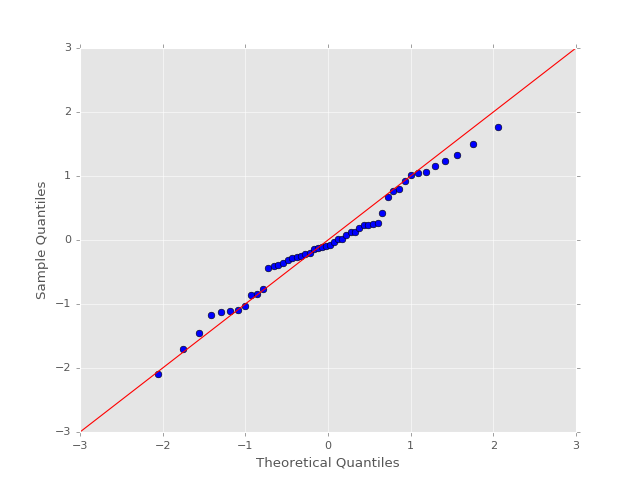

In [51]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt

data = np.random.normal(0,1,50)

sm.qqplot(data, line = '45')
plt.show()

<IPython.core.display.Javascript object>


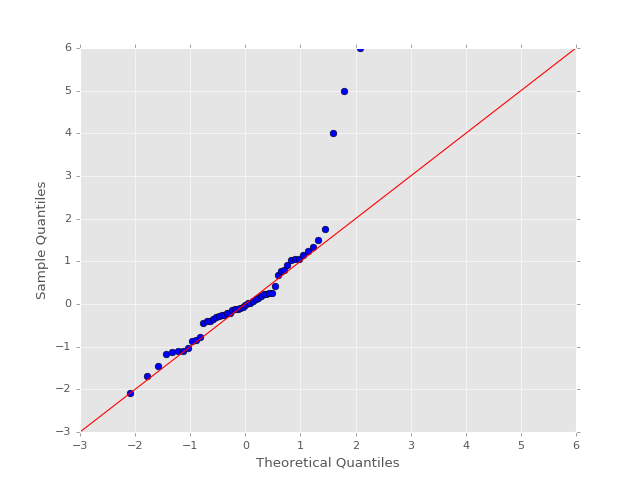

In [52]:
sm.qqplot(np.append(data, [4,5,6]), line='45')
plt.show()

## Scatter plot
Use DataFrame.plot.scatter() which requires numeric columns for x and y

<IPython.core.display.Javascript object>


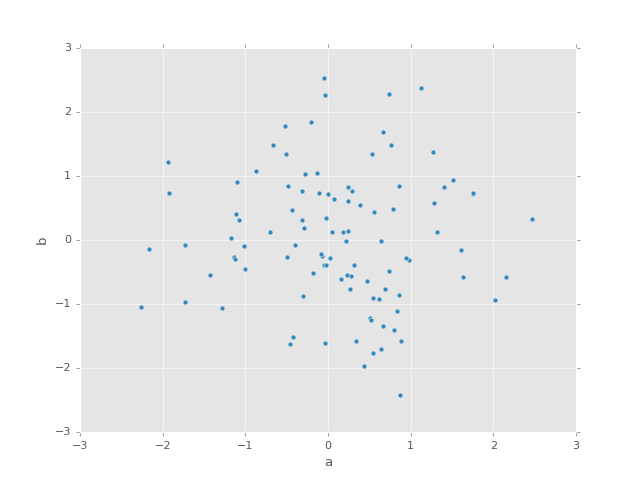

In [53]:
df = pd.DataFrame(np.random.randn(100,4), columns=list('abcd'))
df.plot.scatter(x='a', y='b')

<IPython.core.display.Javascript object>


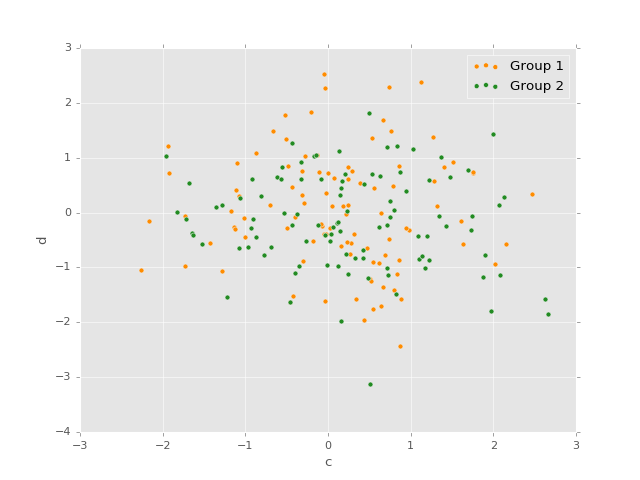

In [54]:
#or plot muliple columns on a single axis, repeat plot method specifying target ax
ax = df.plot.scatter(x='a',y='b', color='DarkOrange',label='Group 1')
df.plot.scatter(x='c',y='d', color='forestgreen', label='Group 2', ax=ax)

<IPython.core.display.Javascript object>


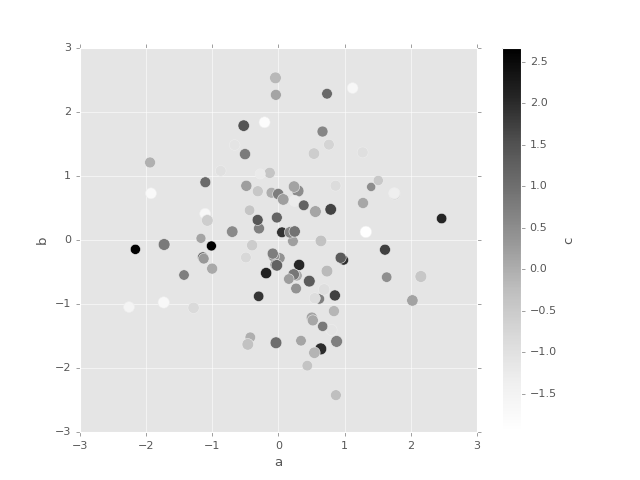

In [55]:
#c for color for each point, s for size
df.plot.scatter(x='a',y='b',c='c',s=(df['d']+10)*10)

<IPython.core.display.Javascript object>


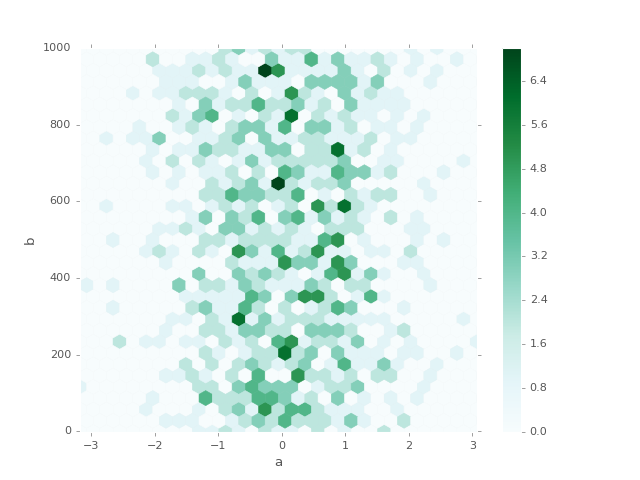

In [56]:
#hex plots are useful when plot is too dense to distinguish between points
df = pd.DataFrame(np.random.randn(1000,2), columns=['a','b'])
df['b'] = df['b'] + np.arange(1000)#arange returns evenly spaced values 
df.plot.hexbin(x='a',y='b',gridsize=30)

## Interactive 3D scatter plots

<IPython.core.display.Javascript object>


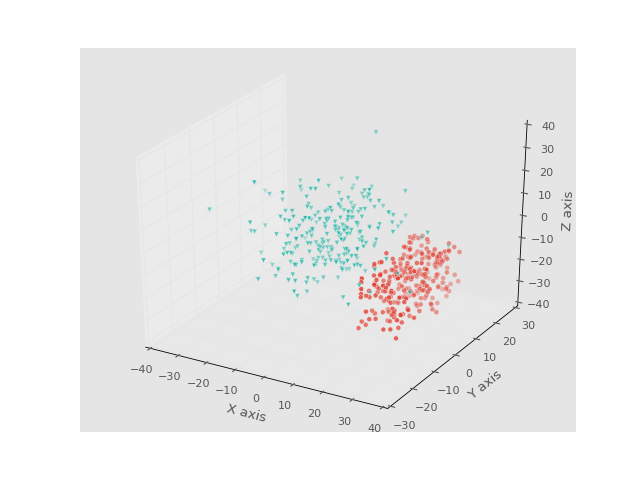

In [57]:
from mpl_toolkits.mplot3d import Axes3D
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#generate data
n = 250
# Create a lambda function to generate the n random values in the given range
#np.random.rand returns [0,1)
f = lambda minval, maxval, n: minval + (maxval - minval) * np.random.rand(n)
g = lambda mean, sd, n: np.random.normal(mean, sd, n)
# Generate the values: uniformly distributed cluster
x_vals = f(15, 30, n)
y_vals = f(-10, 20, n)
z_vals = f(-32, -5, n)
#normally distributed cluster
x_vals_g = g(0,10,n)
y_vals_g = g(0,10,n)
z_vals_g = g(0,10,n)

# Plot the clusters in 3D
ax.scatter(x_vals, y_vals, z_vals, c='#e34234', marker='o')
ax.scatter(x_vals_g, y_vals_g, z_vals_g, c = '#21B6A8', marker = 'v')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

In [58]:
df.head(5)

,a,b
0,0.494951,-0.084905
1,-0.183732,-2.021946
2,1.546534,1.150656
3,-1.029209,3.857839
4,-0.053750,2.608498


## Pie Plot

<IPython.core.display.Javascript object>


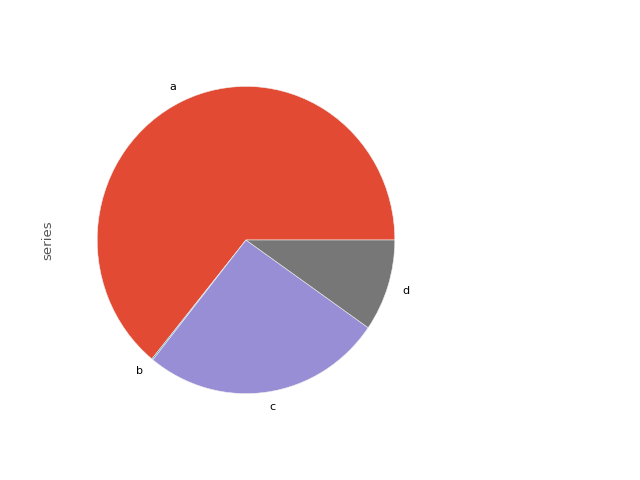

"\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Labels and corresponding values in counter clockwise direction\ndata = {'Apple': 26, \n        'Mango': 17,\n        'Pineapple': 21, \n        'Banana': 29, \n        'Strawberry': 11}\n\n# List of corresponding colors\ncolors = ['orange', 'lightgreen', 'lightblue', 'gold', 'cyan']\n\n# Needed if we want to highlight a section\nexplode = (0, 0.3, 0, 0, 0)  \n\n# Plot the pie chat\nplt.pie(list(data.values()), explode=explode, labels=data.keys(), \n        colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)\n\n# Aspect ratio of the pie chart, 'equal' indicates that want it to be a circle\nplt.axis('equal')\nplt.show()"

In [59]:
#pie plot
series = pd.Series(3*np.random.rand(4), index=list('abcd'), name='series')#uniform dist rather than normal
plt.figure()#without this, will overwrite previous plot 
series.plot.pie(figsize=(6,6))

#-------------------------------#
#labels and values dictionary (counterclockwise)
"""
import numpy as np
import matplotlib.pyplot as plt

# Labels and corresponding values in counter clockwise direction
data = {'Apple': 26, 
        'Mango': 17,
        'Pineapple': 21, 
        'Banana': 29, 
        'Strawberry': 11}

# List of corresponding colors
colors = ['orange', 'lightgreen', 'lightblue', 'gold', 'cyan']

# Needed if we want to highlight a section
explode = (0, 0.3, 0, 0, 0)  

# Plot the pie chat
plt.pie(list(data.values()), explode=explode, labels=data.keys(), 
        colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)

# Aspect ratio of the pie chart, 'equal' indicates that want it to be a circle
plt.axis('equal')
plt.show()"""

## Scatter Matrix Plot

<IPython.core.display.Javascript object>


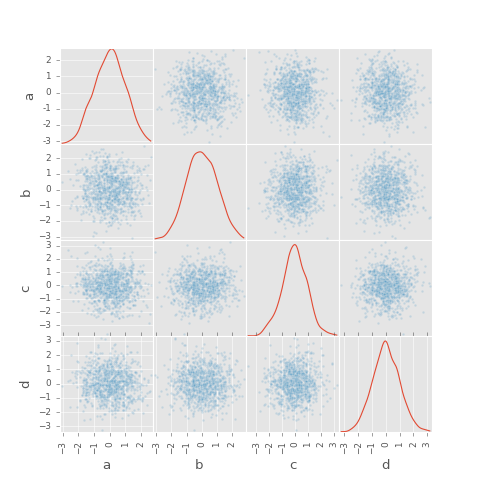

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2361d6e6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f236197d518>]], dtype=object)

In [60]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000,4), columns=list('abcd'))
#this may take a noticeable amount of time
scatter_matrix(df, alpha=.2, figsize=(6,6),diagonal='kde')#kernel density estiamtion

## Andrews plot
An Andrews curve allows structure visualization for high dimensional data. Each data point $x={x_1, x_2, \cdots, x_d}$ defines a finite fourier series $$f_x(t) = \frac{x_1}{\sqrt{2}} + x_2 sin(t) + x_3 cos(t) + \cdots$$
which is then plotted for $-\pi < t < \pi$. Each data point can be viewed as a curve between $-\pi$ and $\pi$. We can think of this as a projection of the datapoint onto the vector $$\left(\frac{1}{\sqrt{2}}, sin(t), cos(t), \cdots\right)$$

<IPython.core.display.Javascript object>


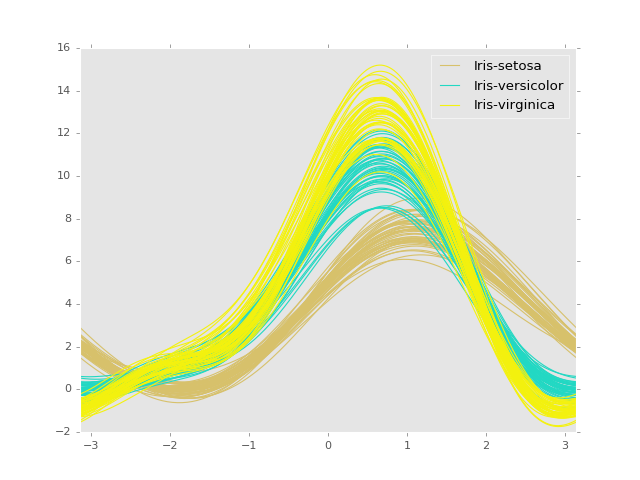

In [61]:
from pandas.tools.plotting import andrews_curves
#from sklearn import datasets
#iris = datasets.load_iris()
data = pd.read_csv('/home/kevin/Documents/data/iris.csv')
#data
plt.figure()
andrews_curves(data, 'Name')

<IPython.core.display.Javascript object>


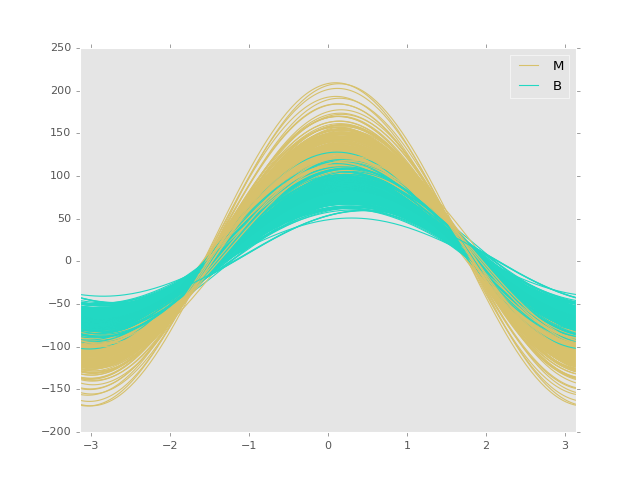

In [62]:
#try on another dataset
data2 = pd.read_csv('/home/kevin/Documents/data/breastcancer/data.csv')
plt.figure()
andrews_curves(data2[[1,2,3,4]],'diagnosis')#remove id
#running directly shows nothing, we probably normalize the data first convert strings to float
#from sklearn import preprocessing

## parallel coordinates
Another method for plotting multivariate data of moderate sizes. Allows us to see clusterss in data. Each vertical line represents an attribute. 1 set of connected line segments represents 1 data point.

<IPython.core.display.Javascript object>


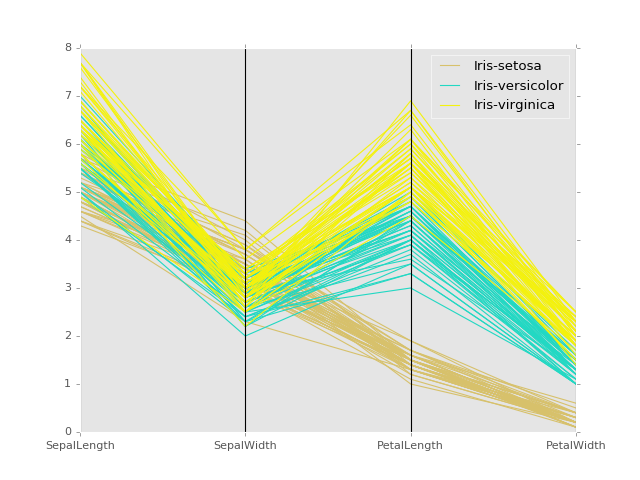

In [63]:
from pandas.tools.plotting import parallel_coordinates
data = pd.read_csv('/home/kevin/Documents/data/iris.csv')
plt.figure()#need to prevent overwriting of previous plot
parallel_coordinates(data,'Name')
#it seems like versicolor and virginica are 'more similar' than setosa in their petals

## more advanced plotting (to be continued in part 2)